In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

In [2]:
# import the covid date csv
covid = pd.read_csv('all-states-history.csv')
covid

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20776,2020-01-16,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20777,2020-01-15,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20778,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [3]:
# pull out a selection of columns and drop rows with missing data
cv_d_hos = covid[['date', 'state', 'death', 'hospitalized', 'hospitalizedCurrently']]
cv_d_hos.dropna(axis=0, inplace=True)
cv_d_hos

<ipython-input-3-e0b63b703cfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_d_hos.dropna(axis=0, inplace=True)


,date,state,death,hospitalized,hospitalizedCurrently
0,2021-03-07,AK,305.0,1293.0,33.0
1,2021-03-07,AL,10148.0,45976.0,494.0
2,2021-03-07,AR,5319.0,14926.0,335.0
4,2021-03-07,AZ,16328.0,57907.0,963.0
6,2021-03-07,CO,5989.0,23904.0,326.0
...,...,...,...,...,...
19457,2020-03-25,MN,1.0,35.0,26.0
19494,2020-03-24,CO,11.0,84.0,152.0
19550,2020-03-23,CO,7.0,72.0,116.0
19606,2020-03-22,CO,6.0,58.0,74.0


In [4]:
# groupby date to sum up data for various states
cvdated = cv_d_hos.groupby(['date']).sum()
cvdated

,death,hospitalized,hospitalizedCurrently
date,,,
2020-03-21,5.0,49.0,56.0
2020-03-22,6.0,58.0,74.0
2020-03-23,7.0,72.0,116.0
2020-03-24,11.0,84.0,152.0
2020-03-25,21.0,219.0,279.0
...,...,...,...
2021-03-03,255490.0,770817.0,21063.0
2021-03-04,256312.0,772347.0,20484.0
2021-03-05,257533.0,775128.0,19678.0


<AxesSubplot:xlabel='date', ylabel='hospitalizedCurrently'>

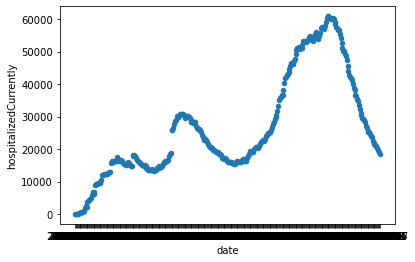

In [5]:
# reset index so date can be used for plotting
cvdated.reset_index(inplace=True)
cvdated.plot.scatter(x='date', y='hospitalizedCurrently')

In [6]:
# use yfinance to pull in stock data for one ticker
ticker = yf.Ticker('AAPL')
hist = ticker.history(period='12mo')

# reset index and rename column to match capitalization of covid df
hist.reset_index(inplace=True)
hist.rename(columns={'Date':'date'}, inplace=True)
hist

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-08-31,NaN,NaN,NaN,NaN,NaN,0.0,4.0
1,2020-09-01,131.911571,133.938543,129.695826,133.322495,151948100.0,0.0,0.0
2,2020-09-02,136.710701,137.098208,126.188382,130.560257,200119000.0,0.0,0.0
3,2020-09-03,126.098953,128.016612,119.729914,120.107483,257599600.0,0.0,0.0
4,2020-09-04,119.302670,122.909469,110.181336,120.186981,332607200.0,0.0,0.0
...,...,...,...,...,...,...,...,...
248,2021-08-25,149.809998,150.320007,147.800003,148.360001,58991300.0,0.0,0.0
249,2021-08-26,148.350006,149.119995,147.509995,147.539993,48597200.0,0.0,0.0
250,2021-08-27,147.479996,148.750000,146.830002,148.600006,55721500.0,0.0,0.0
251,2021-08-30,149.000000,153.490005,148.610001,153.119995,90956700.0,0.0,0.0


In [7]:
# convert date columns to date format so they can merge
hist['date'] = pd.to_datetime(hist['date'])
cvdated['date'] = pd.to_datetime(cvdated['date'])

In [8]:
# merge dataframes on date, only looking at dates with data for covid and the stock
cvhist = pd.merge(cvdated, hist, on='date', how='inner')

In [9]:
# display merged dataframe
cvhist

,date,death,hospitalized,hospitalizedCurrently,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-08-31,88746.0,274009.0,19031.0,NaN,NaN,NaN,NaN,NaN,0.0,4.0
1,2020-09-01,89348.0,275876.0,18790.0,131.911571,133.938543,129.695826,133.322495,151948100.0,0.0,0.0
2,2020-09-02,89876.0,277397.0,19090.0,136.710701,137.098208,126.188382,130.560257,200119000.0,0.0,0.0
3,2020-09-03,90409.0,278885.0,18636.0,126.098953,128.016612,119.729914,120.107483,257599600.0,0.0,0.0
4,2020-09-04,90943.0,280134.0,18372.0,119.302670,122.909469,110.181336,120.186981,332607200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
124,2021-03-01,253396.0,766774.0,21692.0,123.355345,127.522014,122.398407,127.382462,116307900.0,0.0,0.0
125,2021-03-02,254206.0,768645.0,21397.0,128.000479,128.309488,124.611320,124.720970,102260900.0,0.0,0.0
126,2021-03-03,255490.0,770817.0,21063.0,124.411953,125.309084,121.451423,121.670723,112966300.0,0.0,0.0
127,2021-03-04,256312.0,772347.0,20484.0,121.361716,123.205814,118.241701,119.746880,178155000.0,0.0,0.0


<AxesSubplot:xlabel='death', ylabel='Close'>

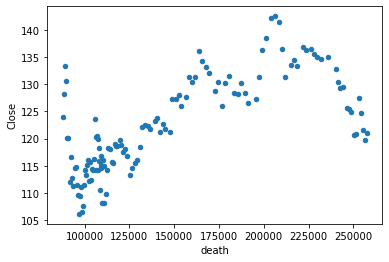

In [43]:
# plot daily covid death total vs stock closing value
cvhist.plot.scatter(x='death', y='Close')